# 

<img align="left" src = https://linea.org.br/wp-content/themes/LIneA/imagens/logo-header.jpg width=100 style="padding: 20px"> 

<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=160 style="padding: 20px">  

# QA DP0.2 - TRAINING

**Contact author**: Heloisa da Silva Mengisztki ([heloisasmengisztki@gmail.com](mailto:heloisasmengisztki@gmail.com)) 

**Last verified run**: 2023-05-01 (YYYY-MM-DD) <br><br><br>

This notebook is a quality analysis of the dp0.2 data.

## Métricas base

População: nesse caso a população seria todos os dados que são galáxias coletados pelo Blanco telescópio, toda a base de dados

Amostra: nesse caso pode ser ou o arquivo que vamos ler direto do diretório ou os dados do TAP ou a amostra definida pela Melissa

Variáveis: nesse caso seriam as características por exemplo no TAP de limite de banda

#### Medidas de tendência central

Média - valor que representa o “meio” dos dados

Mediana - o meio de um conjunto organizado 

Moda - o número que mais se repete no conjunto

## Imports

In [1]:
import time
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tables_io

from datetime import datetime

pd.set_option('display.max_rows', 20)
CURR_DIR =  os.getcwd()

%matplotlib inline

## Linearidade BPZ

	Test name (process ID)	Desctiption	PZ algorithm	Input data	Output size (GB)
1	test_fzboost_50_files	Test linearity 	FlexZBoost	50 original files 	201
2	test_fzboost_100_files	Test linearity 	FlexZBoost	100 original files 	402
3	test_fzboost_150_files	Test linearity 	FlexZBoost	150 original files 	601
4	test_fzboost_2x_files	Test linearity 	FlexZBoost	2x original files 	1254


5	test_bpz_50_files	Test linearity 	    BPZ	        50 original files 	203
6	test_bpz_100_files	Test linearity 	    BPZ	        100 original files 	406
7	test_bpz_150_files	Test linearity 	    BPZ	        150 original files 	607
8	test_bpz_2x_files	Test linearity 	    BPZ	        2x original files 	1254

In [162]:
results_1 = pd.read_csv(f"{CURR_DIR}/results/results_1.csv").sort_values(by='process_id')
results_1

,comment,process_id,start,end,duration,user,file_path
6,teste para 100 arquivos originais em nodes imp...,test_bpz_100_files,1900-07-14 02:21:02,1900-07-14 02:24:36,0:14:48,heloisa.mengisztki,/lustre/t0/scratch/users/heloisa.mengisztki/te...
0,teste para 150 arquivos originais em nodes imp...,test_bpz_150_files,1900-07-14 15:56:01,1900-07-14 16:04:23,0:26:24,heloisa.mengisztki,/lustre/t0/scratch/users/heloisa.mengisztki/te...
2,teste para 2x todos os arquivos originais em n...,test_bpz_2x_files,1900-07-15 01:17:11,1900-07-15 01:20:48,0:42:52,heloisa.mengisztki,/lustre/t0/scratch/users/heloisa.mengisztki/te...
3,teste para 50 arquivos originais em nodes impa...,test_bpz_50_files,1900-07-14 01:39:36,1900-07-14 01:43:10,0:07:52,heloisa.mengisztki,/lustre/t0/scratch/users/heloisa.mengisztki/te...
7,teste para 100 arquivos originais em nodes imp...,test_fzboost_100_files,1900-07-14 01:52:16,1900-07-14 01:55:16,0:24:47,heloisa.mengisztki,/lustre/t0/scratch/users/heloisa.mengisztki/te...
1,teste para 150 arquivos originais em nodes imp...,test_fzboost_150_files,1900-07-14 17:08:00,1900-07-14 17:11:06,0:30:26,heloisa.mengisztki,/lustre/t0/scratch/users/heloisa.mengisztki/te...
4,teste para 2x todos os arquivos originais em n...,test_fzboost_2x_files,1900-07-14 18:35:55,1900-07-14 18:38:55,0:57:25,heloisa.mengisztki,/lustre/t0/scratch/users/heloisa.mengisztki/te...
5,teste para 50 arquivos originais em nodes impa...,test_fzboost_50_files,1900-07-14 00:52:27,1900-07-14 00:55:23,0:11:07,heloisa.mengisztki,/lustre/t0/scratch/users/heloisa.mengisztki/te...


In [4]:
linearity_tests_bpz = ["test_bpz_2x_files", "test_bpz_150_files", "test_bpz_100_files", "test_bpz_50_files"]
linearity_tests_fzb = ["test_fzboost_2x_files", "test_fzboost_150_files", "test_fzboost_100_files", "test_fzboost_50_files" ]

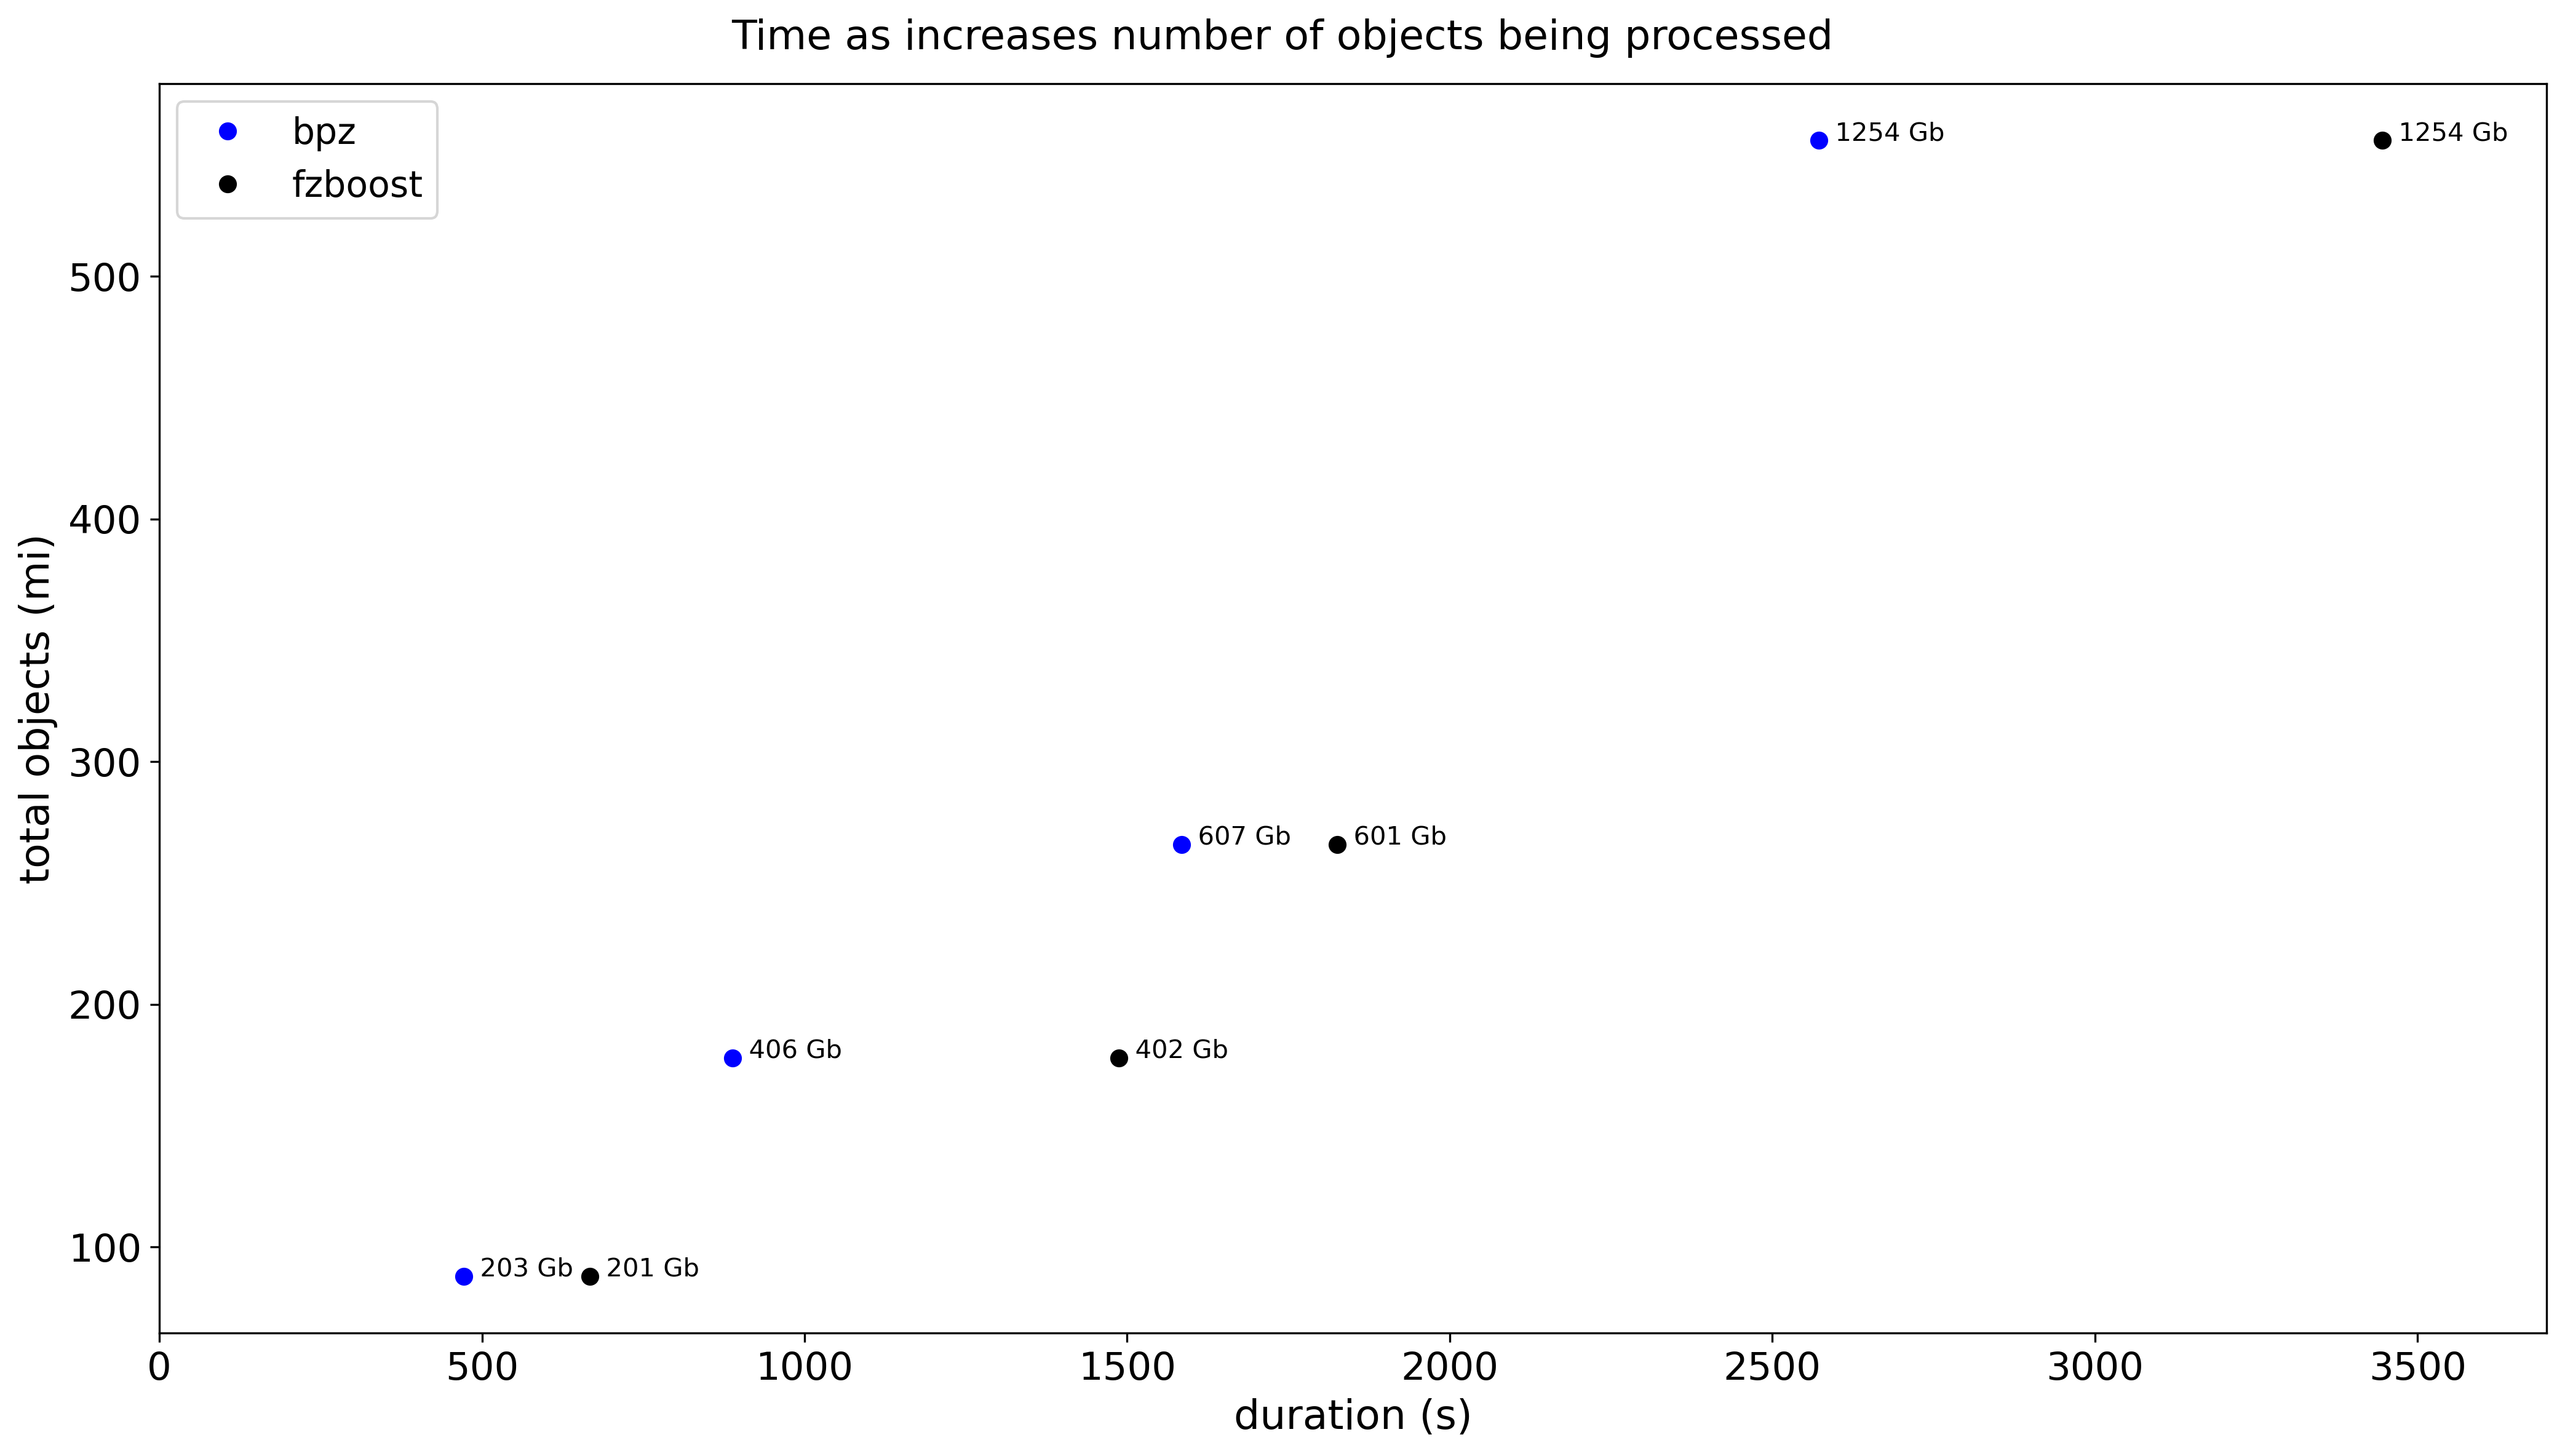

In [57]:
total_time_bpz = []
total_rows_bpz = []

total_time_fzb = []
total_rows_fzb = []

df = pd.read_csv(f"{CURR_DIR}/results/results_1.csv")
dictionary = df.set_index('process_id')['duration'].to_dict()

def time_and_rows(test):
    duration_string = dictionary[test]
    datetime_obj = datetime.strptime(duration_string, '%H:%M:%S')
    duration = datetime_obj.hour * 3600 + datetime_obj.minute * 60 + datetime_obj.second
    
    df_process = pd.read_csv(f"{CURR_DIR}/results/tests/{test}.csv")
    rows = df_process["chunks"].sum()//1_000_000
    #print(test, duration, df_process["chunks"].sum())
    
    return duration, rows

for test in linearity_tests_bpz:
    rows, time = time_and_rows(test)
    total_time_bpz.append(rows)
    total_rows_bpz.append(time)

for test in linearity_tests_fzb:
    rows, time = time_and_rows(test)
    total_time_fzb.append(rows)
    total_rows_fzb.append(time)

plt.figure(figsize=[14,8], dpi=300)
plt.suptitle("Time as increases number of objects being processed", fontsize=16)

plt.plot(total_time_bpz, total_rows_bpz, f"bo", label="bpz", alpha=1)
plt.plot(total_time_fzb, total_rows_fzb, f"ko", label="fzboost", alpha=1)

plt.xlabel(f"duration (s)", fontsize=16)
plt.ylabel("total objects (mi)", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 3700)

plt.text(total_time_bpz[3], total_rows_bpz[3], "  203 Gb")
plt.text(total_time_bpz[2], total_rows_bpz[2], "  406 Gb")
plt.text(total_time_bpz[1], total_rows_bpz[1], "  607 Gb")
plt.text(total_time_bpz[0], total_rows_bpz[0], "  1254 Gb")

plt.text(total_time_fzb[3], total_rows_fzb[3], "  201 Gb")
plt.text(total_time_fzb[2], total_rows_fzb[2], "  402 Gb")
plt.text(total_time_fzb[1], total_rows_fzb[1], "  601 Gb")
plt.text(total_time_fzb[0], total_rows_fzb[0], "  1254 Gb")

plt.legend(prop={'size': 14})

plt.tight_layout()

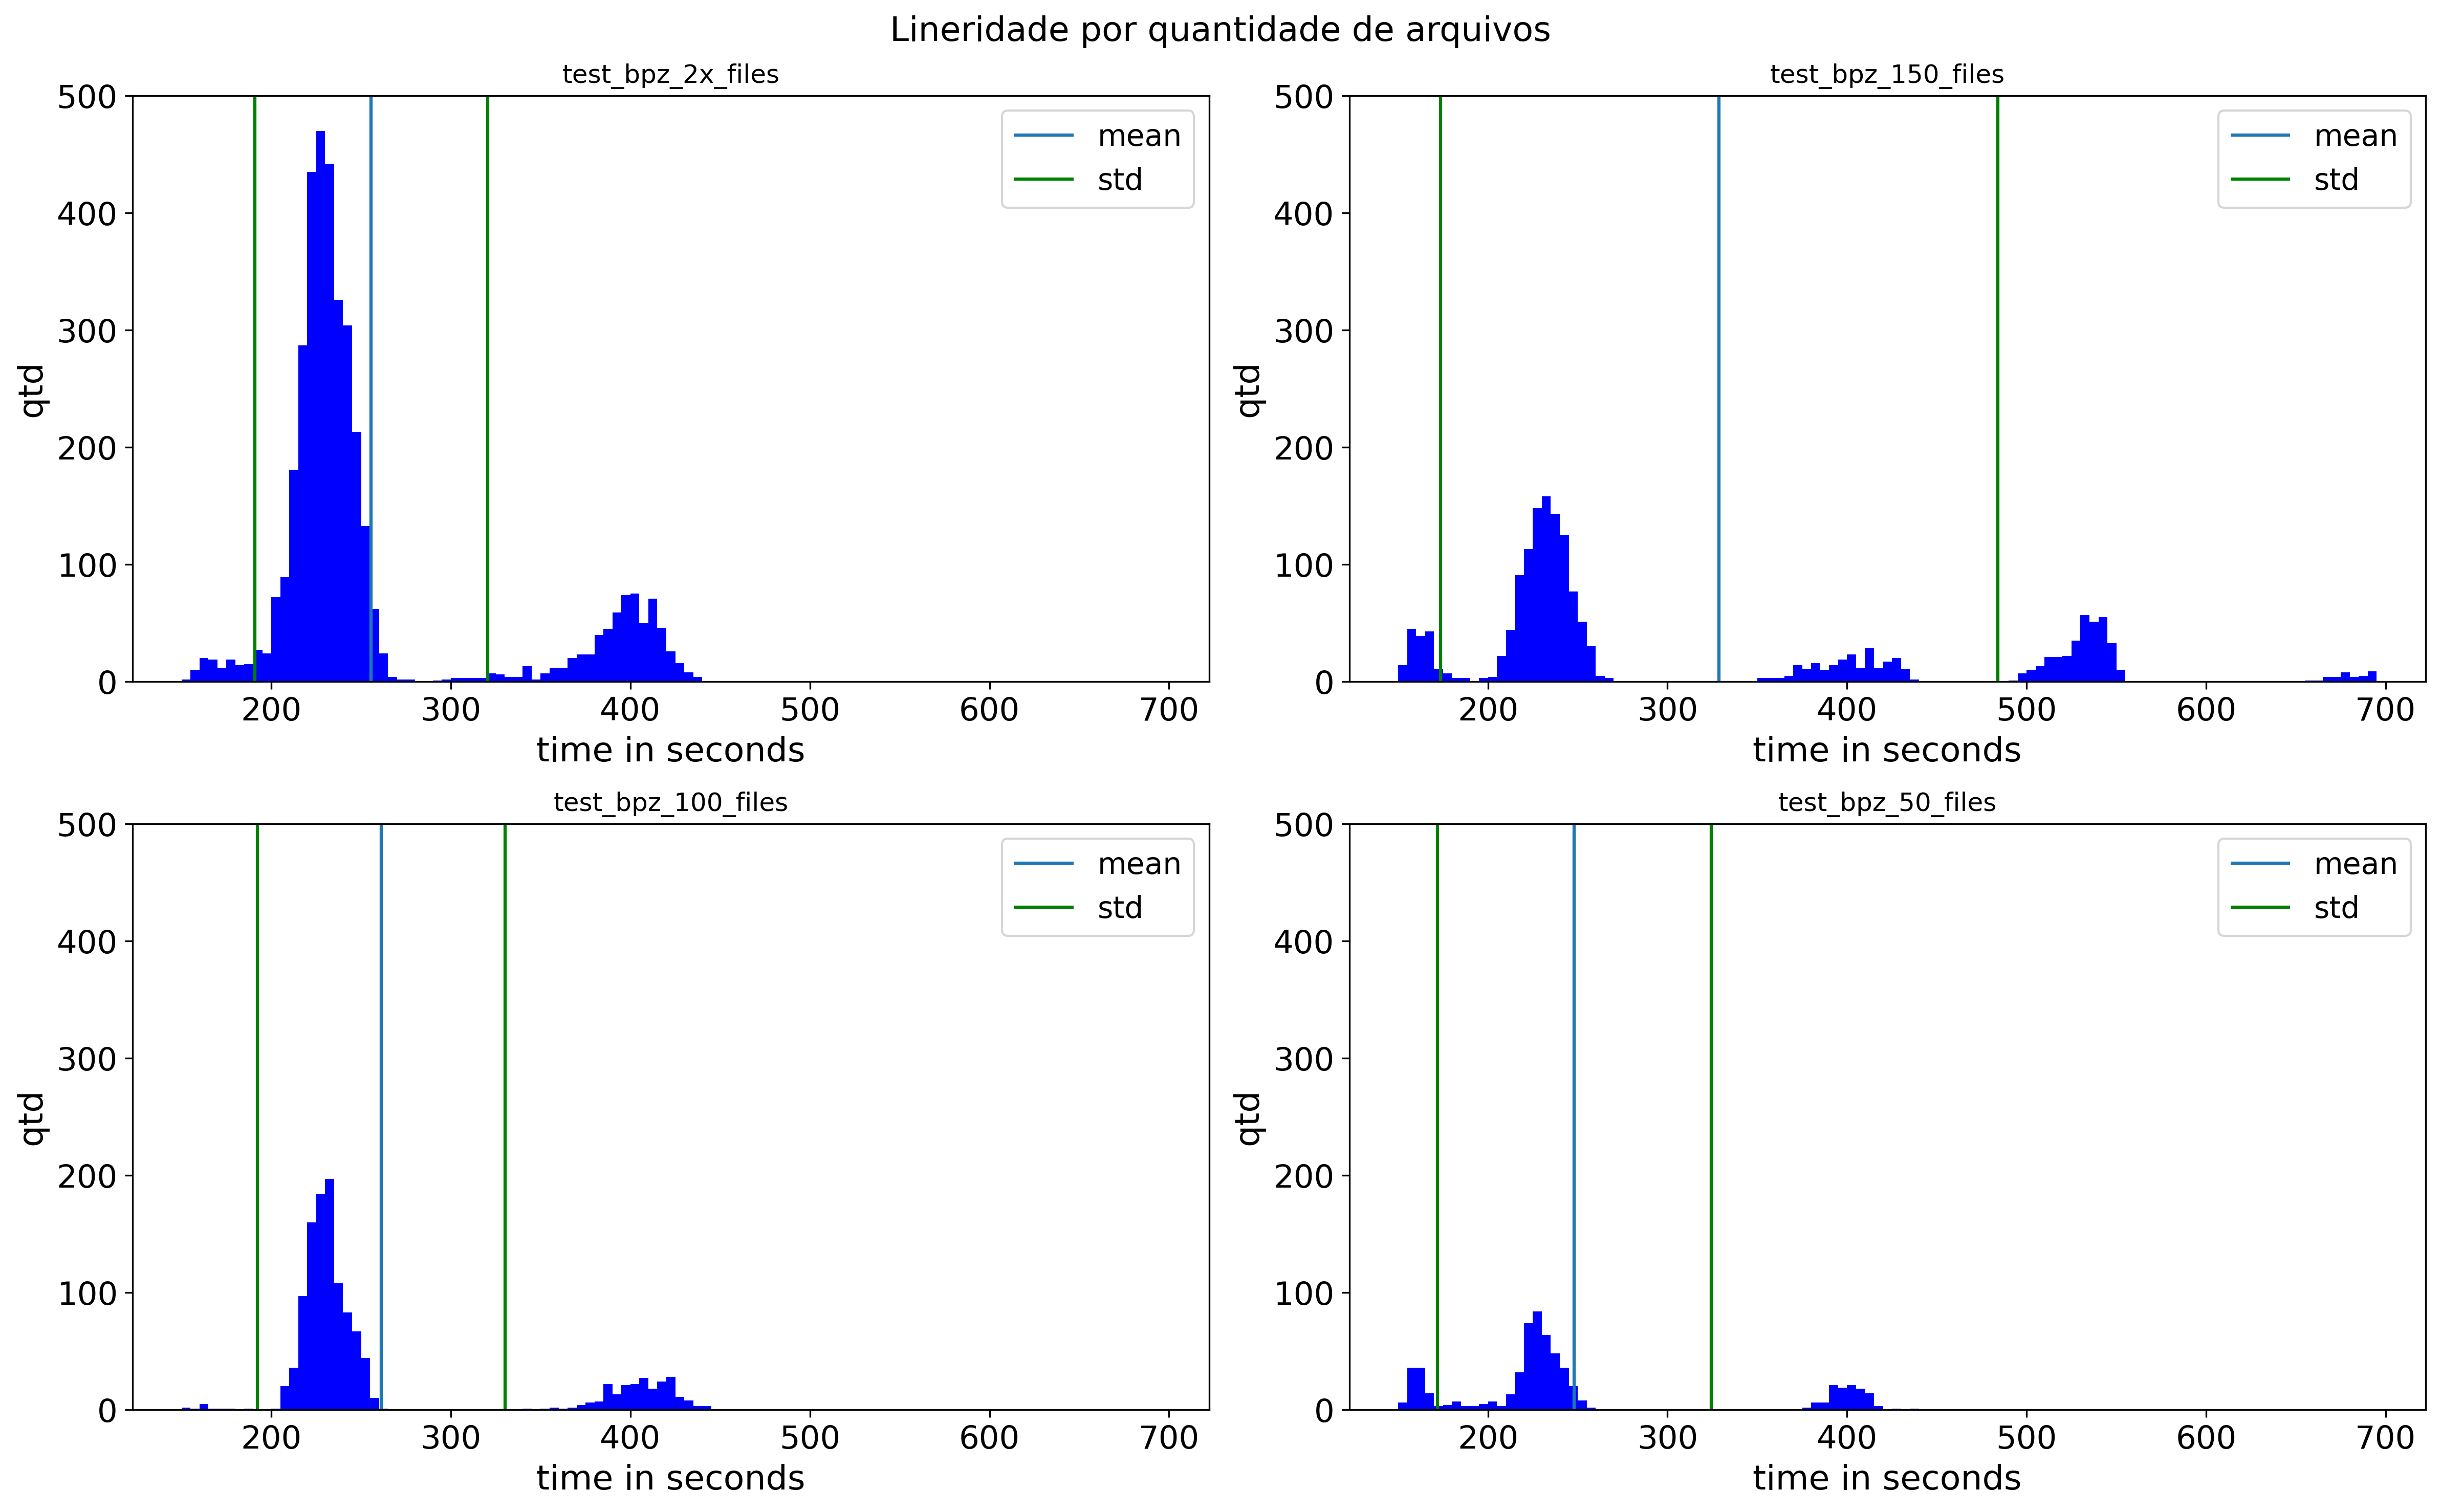

In [6]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Lineridade por quantidade de arquivos", fontsize=16)

pos_grafico = 1

def monta_grafico_hist(pos, df, test):
    plt.subplot(2,2,pos)
    plt.hist(df["time_diff"], bins=np.arange(150,700,5), color="b")
    plt.title(test)
    plt.xlabel(f"time in seconds", fontsize=16)
    plt.ylabel("qtd", fontsize=16)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    mean = df["time_diff"].mean()
    std = df["time_diff"].std()
    
    plt.vlines(mean, 0, 500, label="mean")
    plt.vlines(mean-std, 0, 500, color="g", label="std")
    plt.vlines(mean+std, 0, 500, color="g")
    plt.ylim(0, 500)
    
    plt.legend(prop={'size': 14})
    plt.tight_layout()


for test in linearity_tests_bpz:
    df = pd.read_csv(f"{CURR_DIR}/results/tests/{test}.csv")
    monta_grafico_hist(pos_grafico, df, test)
    pos_grafico = pos_grafico + 1

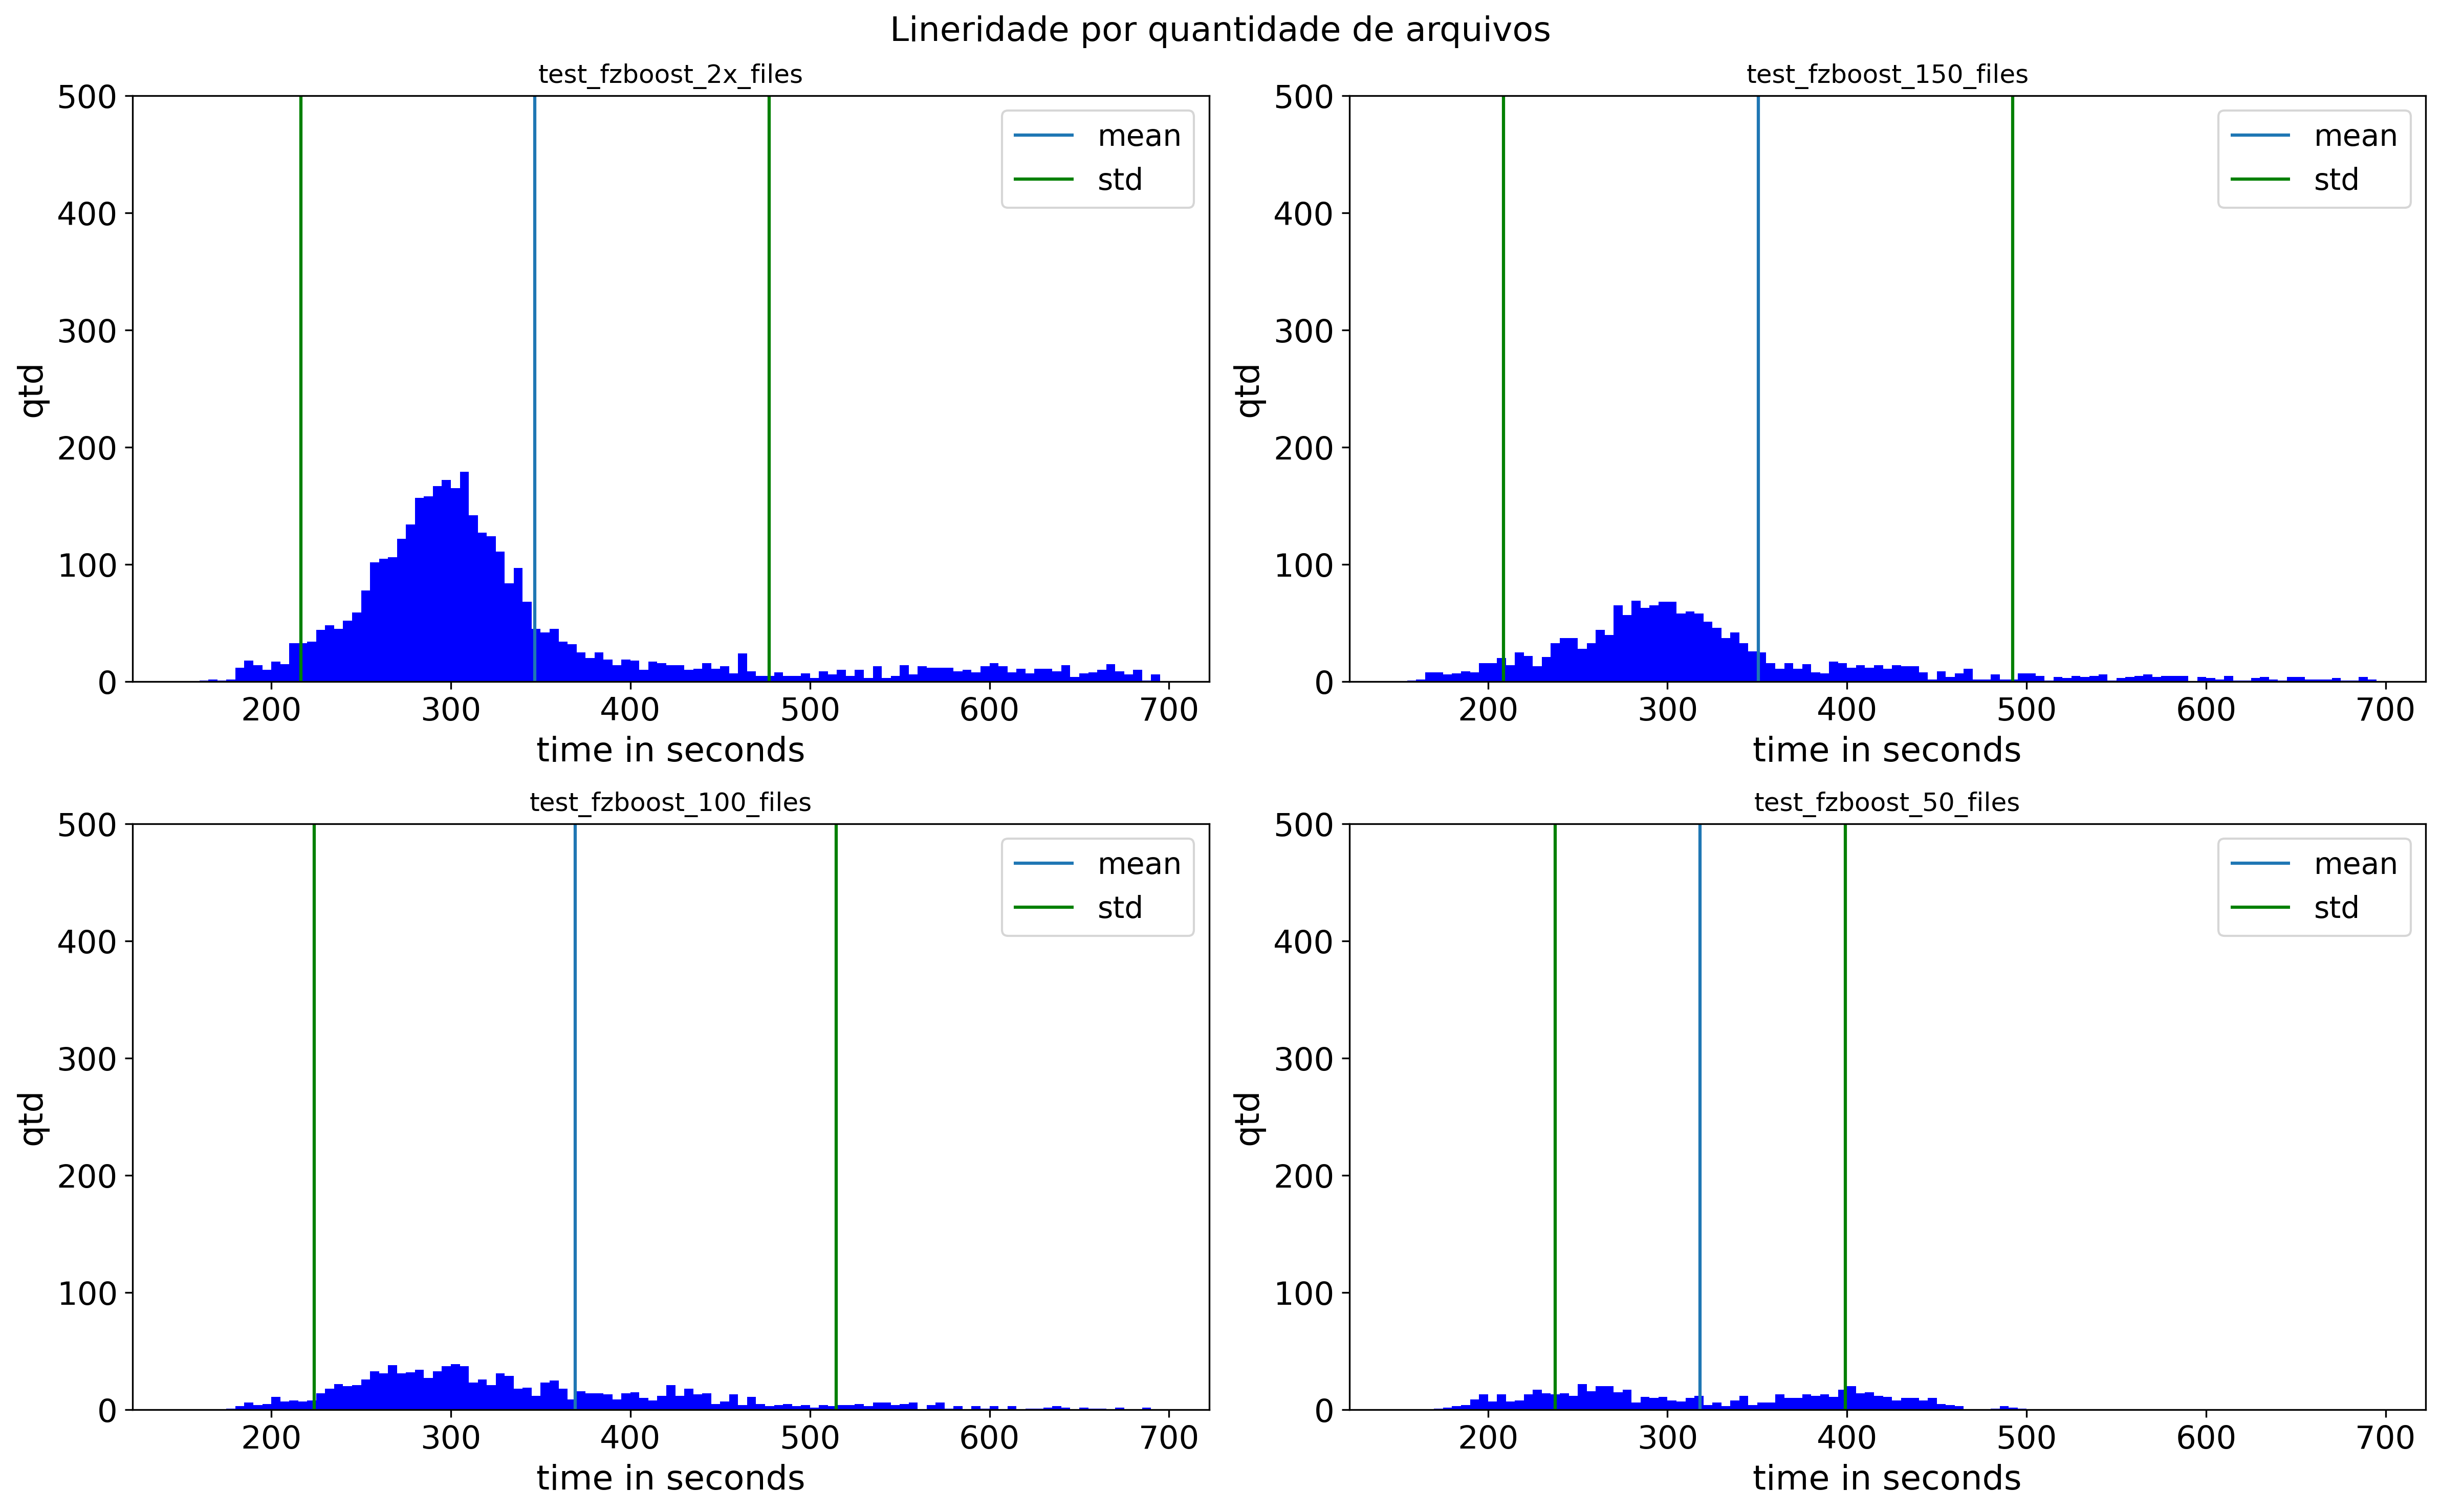

In [7]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Lineridade por quantidade de arquivos", fontsize=16)

pos_grafico = 1

for test in linearity_tests_fzb:
    df = pd.read_csv(f"{CURR_DIR}/results/tests/{test}.csv")
    monta_grafico_hist(pos_grafico, df, test)
    pos_grafico = pos_grafico + 1

## T0 e T1

In [153]:
results_2 = pd.read_csv(f"{CURR_DIR}/results/results_2.csv")
results_3 = pd.read_csv(f"{CURR_DIR}/results/results_3.csv")

In [152]:
results = results_3.query("process_id.str.contains('hardware')")
results.head()

,comment,process_id,start,end,duration,user,file_path
8,Test read and write from Lustre T0. FlexZBoost...,test_hardware_t0,1900-07-13 22:38:22,1900-07-13 22:42:00,0:35:42,julia,/lustre/t0/scratch/users/julia/pcw_2023/test_h...


In [154]:
results = results_2.query("process_id.str.contains('hardware')")
results.head()

,comment,process_id,start,end,duration,user,file_path
4,Test read and write from Lustre T1. FlexZBoost...,test_hardware_t1,1900-07-13 23:57:24,1900-07-14 00:33:33,0:36:09,julia,/lustre/t1/cl/lsst/pz_project/pcw_2023/test_ha...
7,Test read and write from Lustre T1. FlexZBoost...,test_hardware_t1_failed,1900-07-13 21:19:41,1900-07-13 21:22:22,0:11:28,julia,/lustre/t1/cl/lsst/pz_project/pcw_2023/test_ha...


test_hardware_t1 381.7260981912145 77.61134987747745
test_hardware_t0 381.0031007751938 74.9409970647069


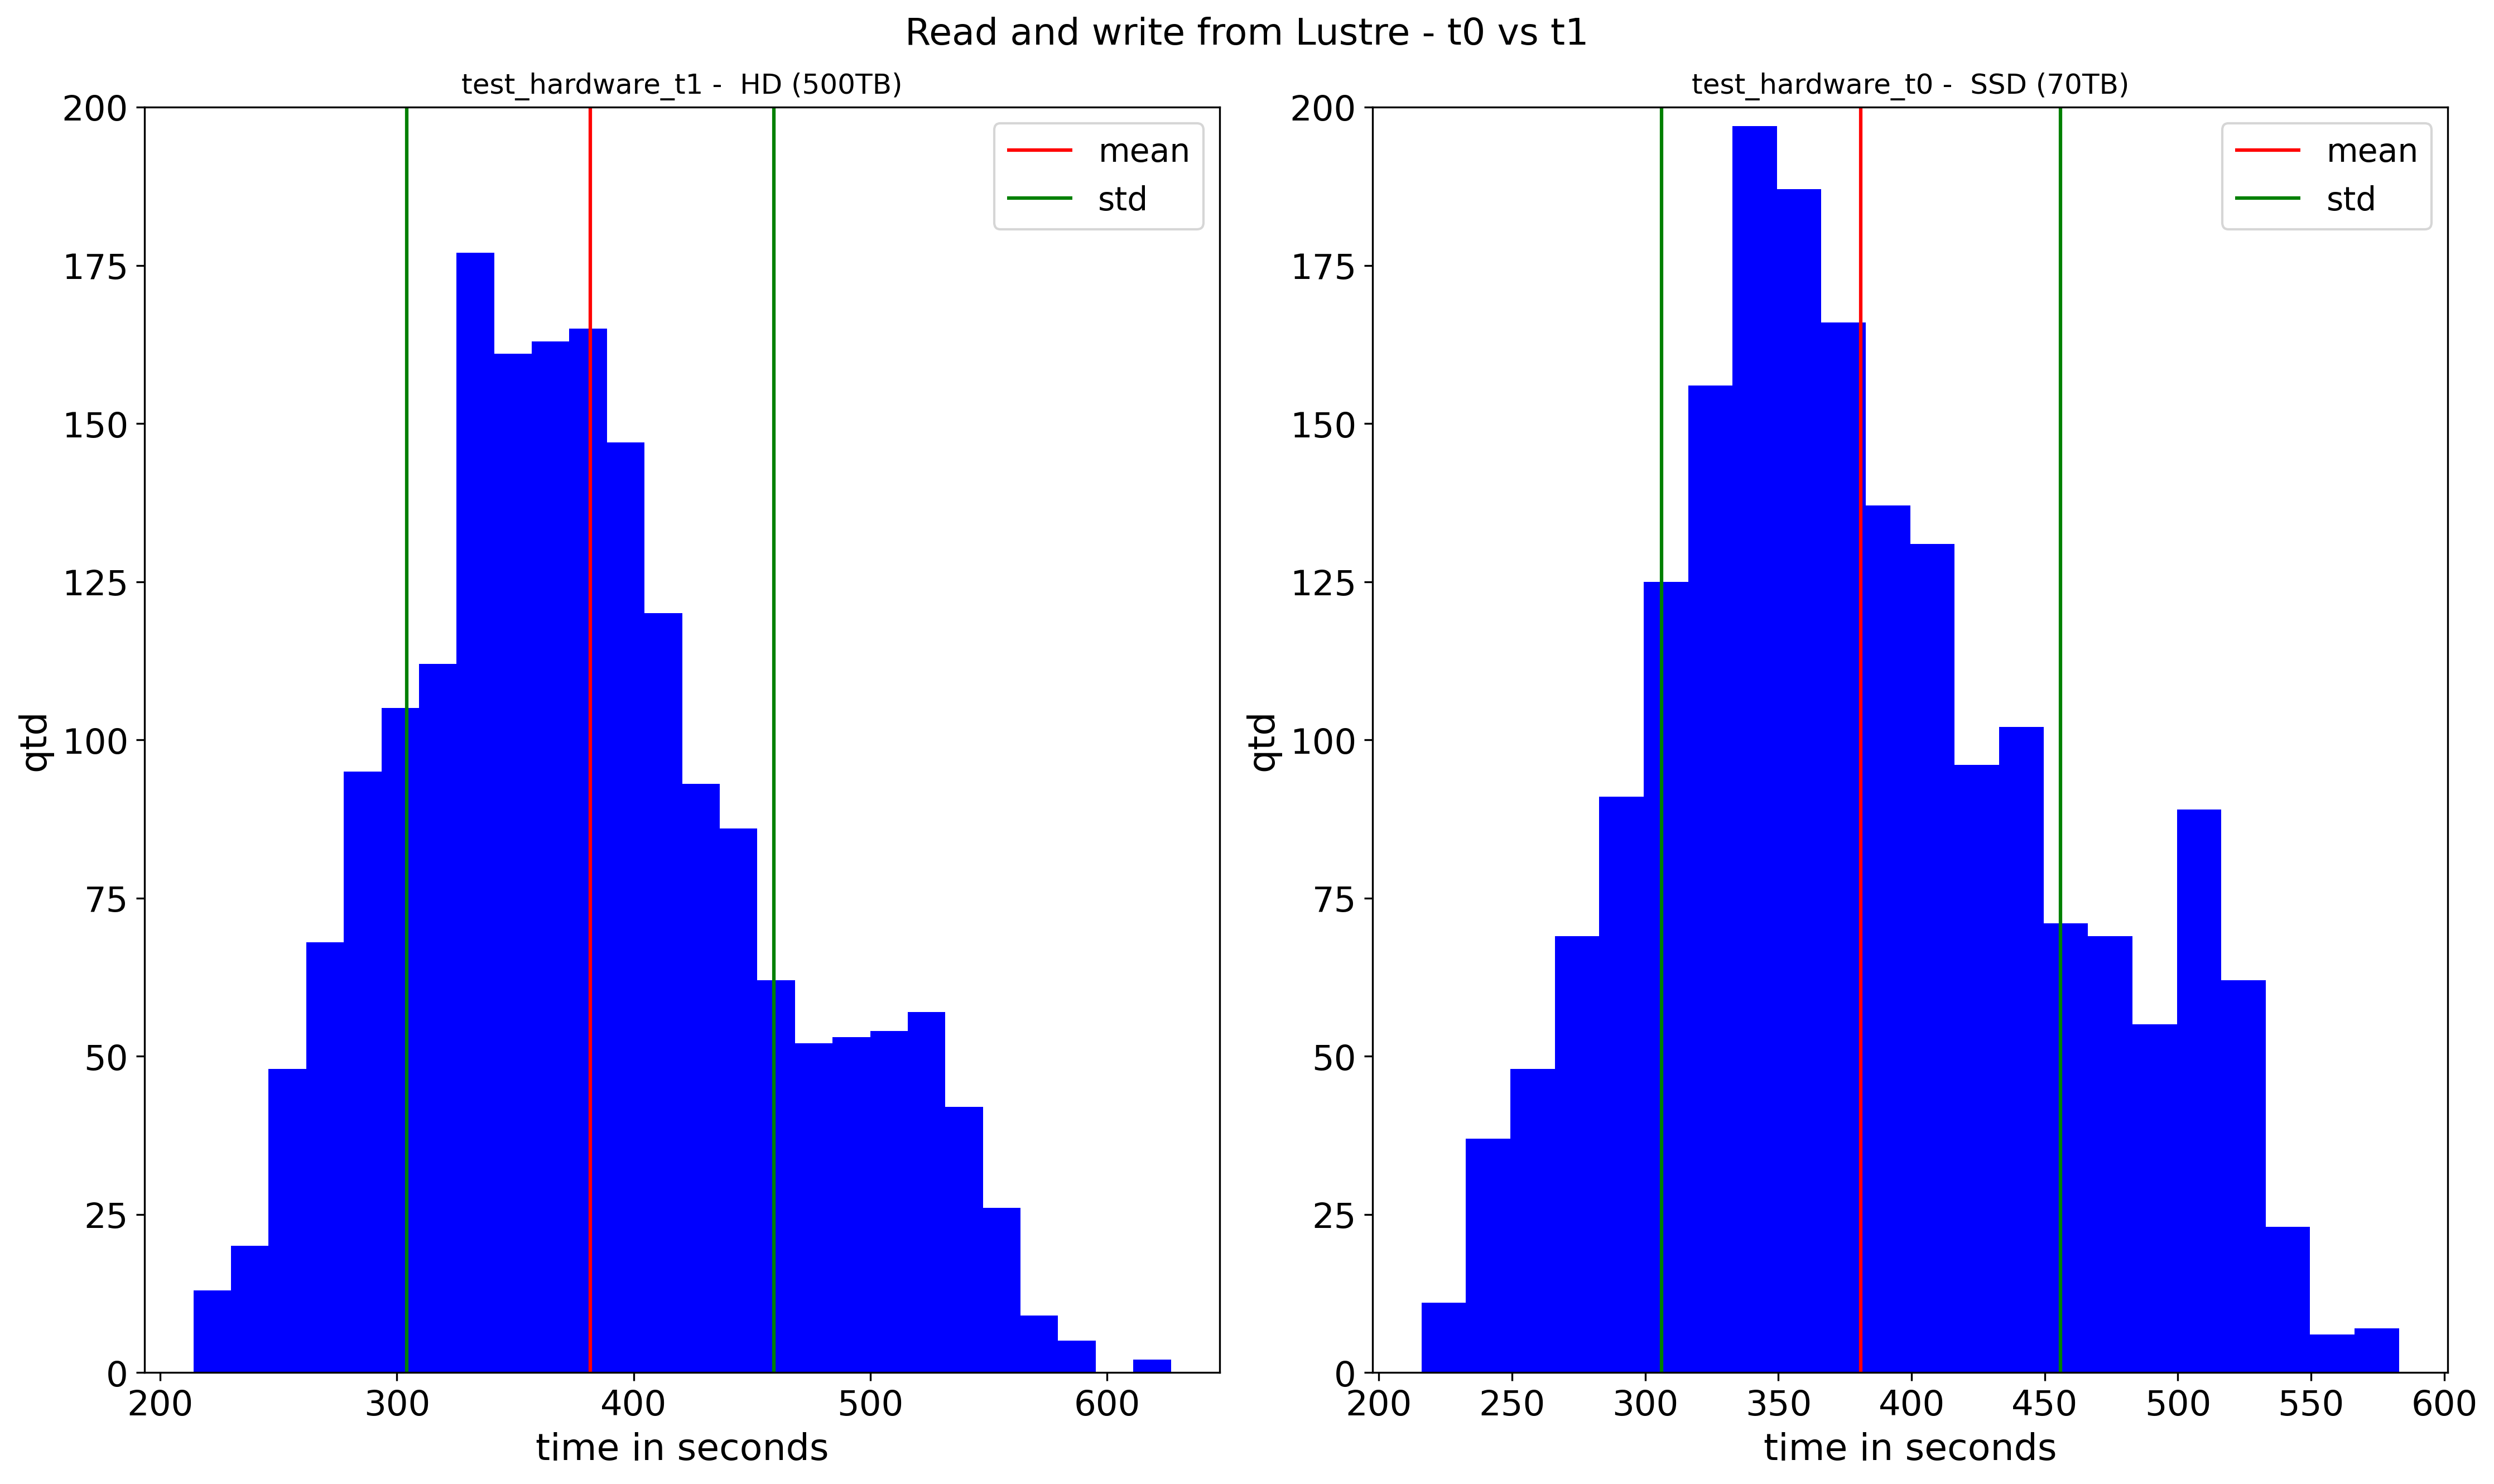

In [129]:
t0_t1_test = {"test_hardware_t1": "HD (500TB)", "test_hardware_t0": "SSD (70TB)"}

plt.figure(figsize=[15,9], dpi=300)
plt.suptitle("Read and write from Lustre - t0 vs t1", fontsize=16)

pos_grafico = 1

def monta_grafico_hist(pos, df, test, desc):
    plt.subplot(1,2,pos)
    plt.hist(df["time_diff"], bins="fd", color="b")
    
    plt.title(f"{test} -  {desc}")
    
    plt.xlabel(f"time in seconds", fontsize=16)
    plt.ylabel("qtd", fontsize=16)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    mean = df["time_diff"].mean()
    std = df["time_diff"].std()
    print(mean, std)
    
    plt.vlines(mean, 0, 500, color="r", label="mean")
    plt.vlines(mean-std, 0, 500, color="g", label="std")
    plt.vlines(mean+std, 0, 500, color="g")
    plt.ylim(0, 200)
    
    plt.legend(prop={'size': 14})
    plt.tight_layout()
    

for test, desc in t0_t1_test.items():
    df = pd.read_csv(f"{CURR_DIR}/results/tests/{test}.csv")
    monta_grafico_hist(pos_grafico, df, test, desc)
    pos_grafico = pos_grafico + 1

## BINS

In [143]:
results_3.query("process_id.str.contains('bins')")
results_3.head()

,comment,process_id,start,end,duration,user,file_path
2,Test FlexZBoost p(z) with 201 bins.,test_fzboost_201_bins,1900-07-15 13:39:39,1900-07-15 14:52:45,1:13:06,julia,/lustre/t0/scratch/users/julia/pcw_2023/test_f...
3,Test FlexZBoost p(z) with 101 bins.,test_fzboost_101_bins,1900-07-14 21:43:23,1900-07-14 22:47:47,1:04:24,julia,/lustre/t0/scratch/users/julia/pcw_2023/test_f...
6,Test FlexZBoost p(z) with 301 bins.,test_fzboost_301_bins,1900-07-15 14:57:59,1900-07-15 15:59:04,1:01:05,julia,/lustre/t0/scratch/users/julia/pcw_2023/test_f...
10,Test FlexZBoost p(z) with 31 bins.,test_fzboost_31_bins,1900-07-14 19:28:57,1900-07-14 21:30:12,2:01:15,julia,/lustre/t0/scratch/users/julia/pcw_2023/test_f...


In [144]:
bins_test = ["test_fzboost_31_bins", "test_fzboost_101_bins", "test_fzboost_201_bins", "test_fzboost_301_bins"]

test_fzboost_31_bins 599.706976744186 787.0875709153711
test_fzboost_101_bins 309.0625322997416 127.68371486275733
test_fzboost_201_bins 349.1736434108527 57.68154047517652
test_fzboost_301_bins 291.5700258397933 49.810469434692116


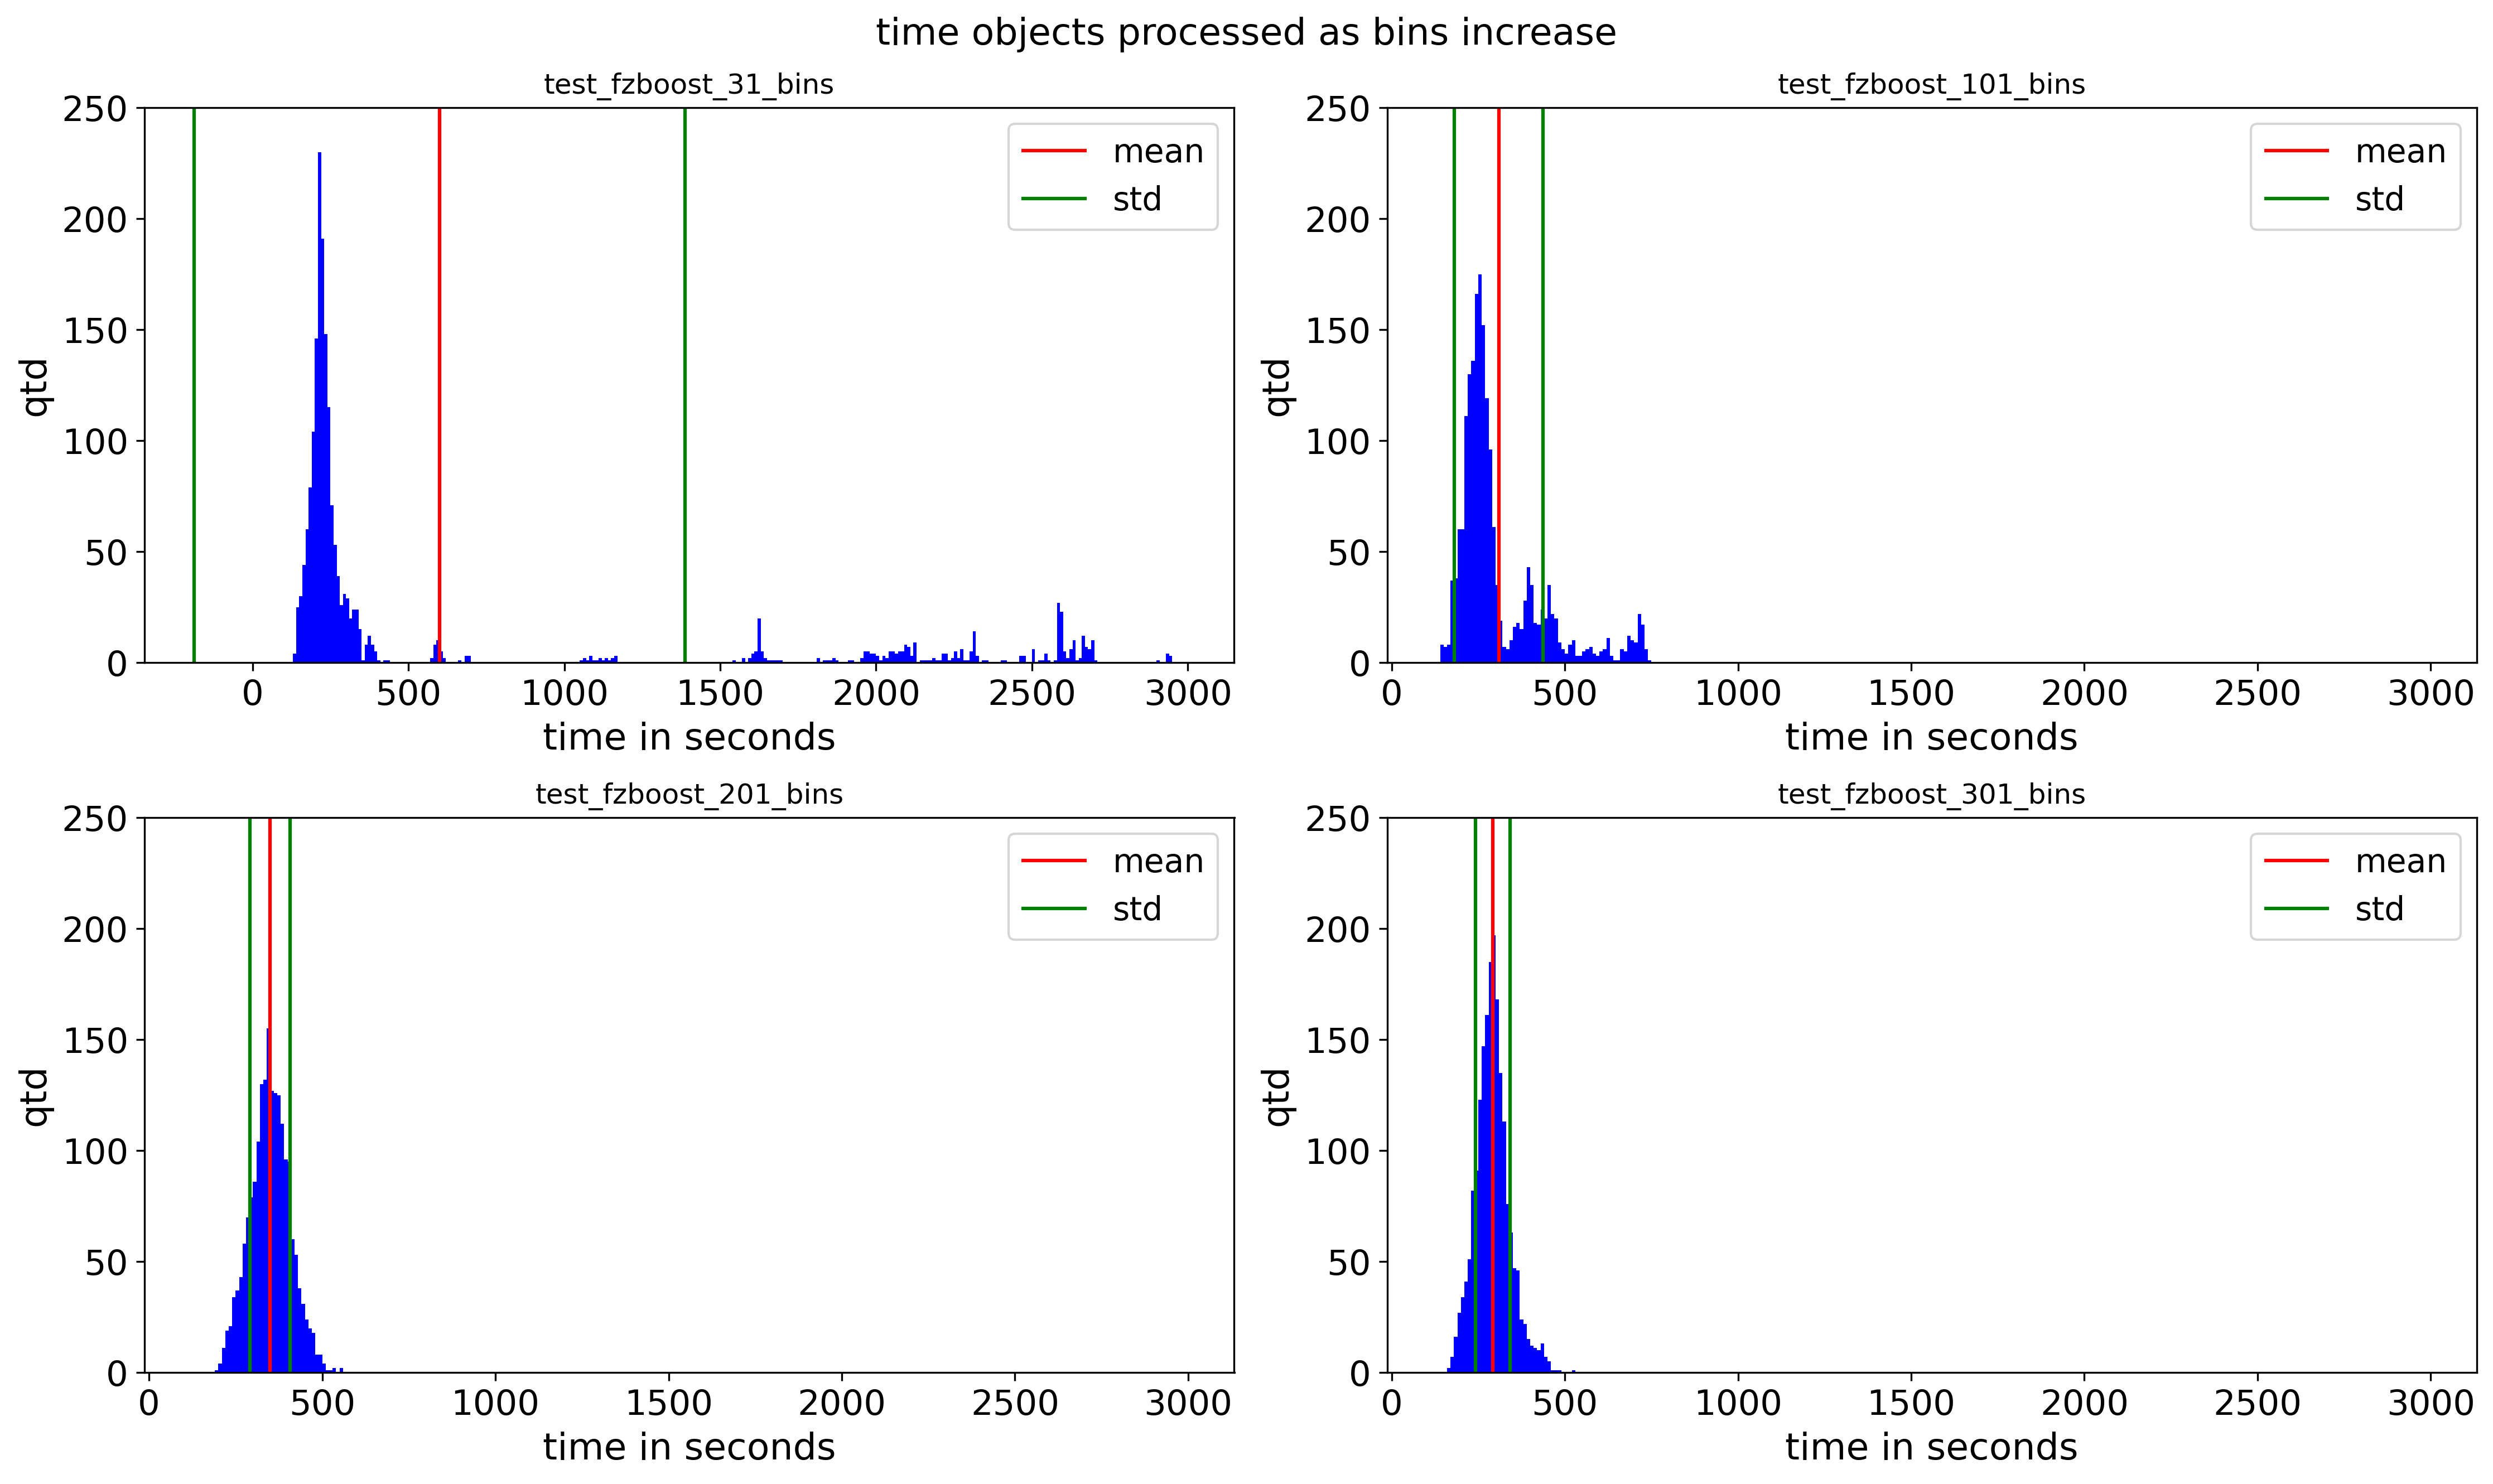

In [146]:
plt.figure(figsize=[15,9], dpi=300)
plt.suptitle("time objects processed as bins increase", fontsize=16)

pos_grafico = 1

def monta_grafico_hist(pos, df, test):
    plt.subplot(2,2,pos)
    plt.hist(df["time_diff"], bins=np.arange(130,3000,10), color="b")
    plt.title(test)
    plt.xlabel(f"time in seconds", fontsize=16)
    plt.ylabel("qtd", fontsize=16)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    mean = df["time_diff"].mean()
    std = df["time_diff"].std()
    
    print(test, mean, std)
    
    plt.vlines(mean, 0, 500, color="r", label="mean")
    plt.vlines(mean-std, 0, 500, color="g", label="std")
    plt.vlines(mean+std, 0, 500, color="g")
    plt.ylim(0, 250)
    
    plt.legend(prop={'size': 14})
    plt.tight_layout()
    

for test in bins_test:
    df = pd.read_csv(f"{CURR_DIR}/results/tests/{test}.csv")
    monta_grafico_hist(pos_grafico, df, test)
    pos_grafico = pos_grafico + 1